<a href="https://colab.research.google.com/github/Turtle-Grace/gracehuangtw/blob/main/0321_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Supervised learning

In this exercise, you will be given two data sets, each of which you are to use to calculate a supervised learning model.


## Task 1: Tumor Classification using K-Nearest Neighbors (KNN)
Classify tumors as **Benign** or **Malignant** based on patient characteristics using **K-Nearest Neighbors (KNN)**.

1. **Preprocessing**
   - Encode categorical variables (`Gender`, `Location`, `Histology`, etc.).
   - Scale numerical features (`Age`, `Tumor_Size`, `Tumor_Growth_Rate`).
   - Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
   - Train a **K-Nearest Neighbors (KNN) classifier** to predict `Tumor_Type` (`Benign` or `Malignant`).
   - Perform **hyperparameter tuning** to find the best `k`.

3. **Model Evaluation**:
   - Plot the **confusion matrix** and **classification report**.
   - Compare accuracy for different values of `k` using a **line plot**.

Question: Based on your accuracy values, would you say that the model is suitable for making reliable classifications about benign and malignant tumors.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('brain_tumor_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [2]:
#1-1. Encode categorical variables (Gender, Location, Histology, etc.).

#Drop non-predictive columns
df_preprocessed = df.drop(columns=['Patient_ID'])

#Encode categorical variables
categorical_features = ['Gender', 'Location', 'Histology', 'Stage', 'Symptom_1',
                        'Symptom_2', 'Symptom_3', 'Radiation_Treatment',
                        'Surgery_Performed', 'Chemotherapy', 'Family_History',
                        'MRI_Result', 'Follow_Up_Required']

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_preprocessed[col] = le.fit_transform(df_preprocessed[col])
    label_encoders[col] = le

In [3]:
#1-2. Scale numerical features (Age, Tumor_Size, Tumor_Growth_Rate).
numerical_features = ['Age', 'Tumor_Size', 'Tumor_Growth_Rate']
scaler = StandardScaler()
df_preprocessed[numerical_features] = scaler.fit_transform(df_preprocessed[numerical_features])


In [5]:
#1-3. Split the dataset into training (80%) and testing (20%) sets.
# Define features (X) and target variable (y)
X = df_preprocessed.drop(columns=['Tumor_Type'])
y = df_preprocessed['Tumor_Type'].map({'Benign': 0, 'Malignant': 1})
#Test if the data set is well divided/encoded as 0&1
print(y.value_counts())
#Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Output dataset shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Tumor_Type
1    10030
0     9970
Name: count, dtype: int64
Training Set Shape: (16000, 17) (16000,)
Test Set Shape: (4000, 17) (4000,)


In [6]:
#2-1. Train a K-Nearest Neighbors (KNN) classifier to predict Tumor_Type (Benign or Malignant).
#Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
#2-2. Perform hyperparameter tuning to find the best k.
#Hyperparameter tuning for best k
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Best parameter and model performance
best_k = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_

#Evaluate on test data
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
confusion_mat = confusion_matrix(y_test, y_pred)

best_k, accuracy, confusion_mat, classification_rep

(5,
 0.4925,
 array([[ 996, 1001],
        [1029,  974]]),
 '              precision    recall  f1-score   support\n\n      Benign       0.49      0.50      0.50      1997\n   Malignant       0.49      0.49      0.49      2003\n\n    accuracy                           0.49      4000\n   macro avg       0.49      0.49      0.49      4000\nweighted avg       0.49      0.49      0.49      4000\n')

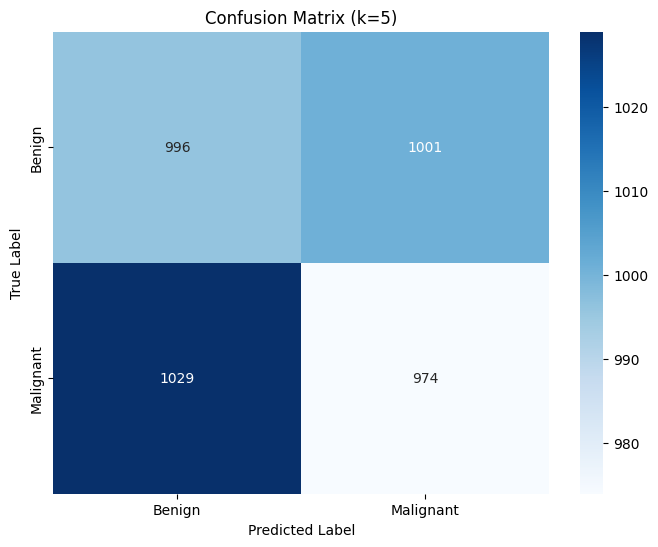

Classification Report (k=5):

              precision    recall  f1-score   support

      Benign       0.49      0.50      0.50      1997
   Malignant       0.49      0.49      0.49      2003

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



In [8]:
#3-1. Model Evaluation:Plot the confusion matrix and classification report.

initial_k = 5
knn_initial = KNeighborsClassifier(n_neighbors=initial_k)
knn_initial.fit(X_train, y_train)
y_pred_initial = knn_initial.predict(X_test)

#Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_initial)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title(f'Confusion Matrix (k={initial_k})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Print classification report
print("Classification Report (k=5):\n")
print(classification_report(y_test, y_pred_initial, target_names=['Benign', 'Malignant']))


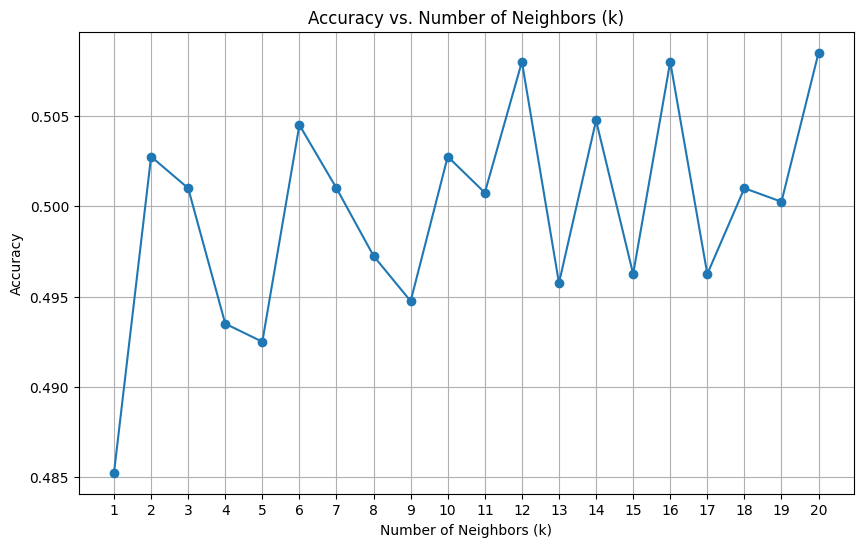

Best k value: 20 with accuracy: 0.51


In [10]:
#3-2. Compare accuracy for different values of k using a line plot.

#Evaluate accuracy for different values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

#Plot accuracy comparison across k-values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Optimal k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k value: {best_k} with accuracy: {max(accuracies):.2f}")

Question: Based on your accuracy values, would you say that the model is suitable for making reliable classifications about benign and malignant tumors.
**A:Despite the reported accuracy being ~49%, which is close to random guessing (like flipping a coin), all key classification metrics are poor. It's not learning meaningful patterns to distinguish benign vs. malignant tumors, which makes it unsuitable for any medical or diagnostic application.**

## Task 2
The goal of this exercise is to predict **Life Expectancy** (`Life expectancy`) based on various health, economic, and demographic factors using **Linear Regression**. The model should be optimized using **Ridge and Lasso Regression**.

1. **Preprocessing**
- Remove irrelevant columns (`Country`, `Year`).
- Encode categorical variables (`Status`).
- Handle missing values appropriately.
- Standardize numerical features (e.g., `GDP`, `Schooling`, `Alcohol`) using `StandardScaler`.
- Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
- Train a **basic Linear Regression** model and evaluate its performance.
- Implement **Ridge Regression** and **Lasso Regression**, tuning the `alpha` hyperparameter using **cross-validation**.

3. **Model Evaluation**:
- Compute the **Root Mean Squared Error (MSE)** for all models.
- Compare Ridge and Lasso performance to determine if regularization improves results.
- Plot **actual vs. predicted life expectancy** scores for each model.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV # Import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error # Import mean_squared_error


df = pd.read_csv("Life Expectancy Data.csv")
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [39]:
#1-1. Remove irrelevant columns (Country, Year).
new_df = df.drop(columns=['Country', 'Year'])


#1-2. Encode categorical variables
categorical_features = ['Status']
for col in categorical_features:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])

#1-3.
#Fill numeric columns with fewer missing values using median
columns_median_fill = ['Life expectancy ', 'Adult Mortality', ' BMI ', 'Polio',
                       'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years','Alcohol', 'Total expenditure', 'Income composition of resources', 'Schooling']
for col in columns_median_fill:
    new_df[col].fillna(new_df[col].median(), inplace=True)


#Columns with Large Missing Values (above ~10%) -> KNN
columns_large_missing = ['Hepatitis B', 'GDP', 'Population']
knn_imputer = KNNImputer(n_neighbors=5)
new_df[columns_large_missing] = knn_imputer.fit_transform(df[columns_large_missing])

#Verify if all missing values have been filled
new_df.isnull().sum().sum()  # This should return 0 if no missing values are left

missing_values = new_df.isnull().sum() #Recalculate missing values for new_df

#Display the count of missing values per column
missing_values[missing_values > 0]


<ipython-input-39-18761d958ca7>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[col].fillna(new_df[col].median(), inplace=True)


,0


In [40]:
#1-4. Standardize selected numerical features
features_to_scale = ['GDP', 'Schooling', 'Alcohol']
scaler = StandardScaler()
new_df[features_to_scale] = scaler.fit_transform(new_df[features_to_scale])


In [41]:
#1-5. Split dataset into training and testing sets
X = new_df.drop(columns=['Life expectancy '])
y = new_df['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Display shapes as confirmation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 19), (588, 19), (2350,), (588,))

In [54]:
#2-1. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

#2-2. Ridge Regression with Cross-Validation
ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

#2-2. Lasso Regression with Cross-Validation
lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.41305e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.60339e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.52144e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.23277e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

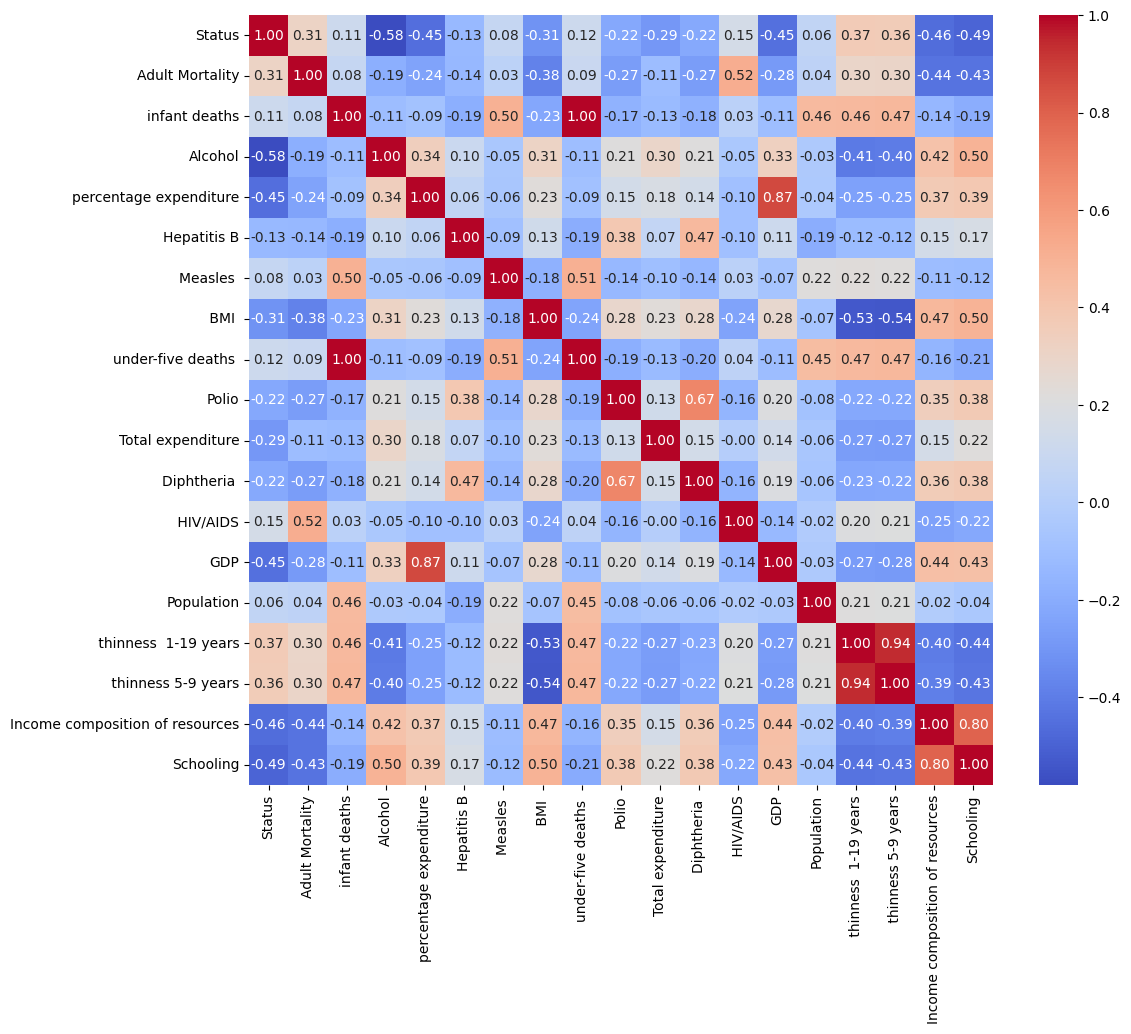

In [53]:
#The error messages mean: The matrix used in the calculations is ill-conditioned — meaning it's almost singular (non-invertible), so the result may be numerically unstable or inaccurate.
#check for multicollinearity

import seaborn as sns
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)  # Assign the scaled data to 'X_scaled'

# Create a DataFrame from the scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now you can use 'X_scaled_df' in your heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [46]:
#3-1. Compute the Root Mean Squared Error (MSE) for all models.
rmse_results = {
    'Linear Regression RMSE': rmse_lr,
    'Ridge Regression RMSE': rmse_ridge,
    'Lasso Regression RMSE': rmse_lasso
}
rmse_results


{'Linear Regression RMSE': np.float64(3.9122719249066567),
 'Ridge Regression RMSE': np.float64(3.9104527713015846),
 'Lasso Regression RMSE': np.float64(3.9100092169636964)}

All models yield nearly identical RMSE, which means:
The dataset is well-behaved.
There is low multicollinearity or noise, so regularization (Ridge, Lasso) doesn’t drastically improve performance.

In [ ]:
#3-2. Compare Ridge and Lasso performance to determine if regularization improves results.
#Regularization helps prevent overfitting, but in this case, overfitting may not be a concern.

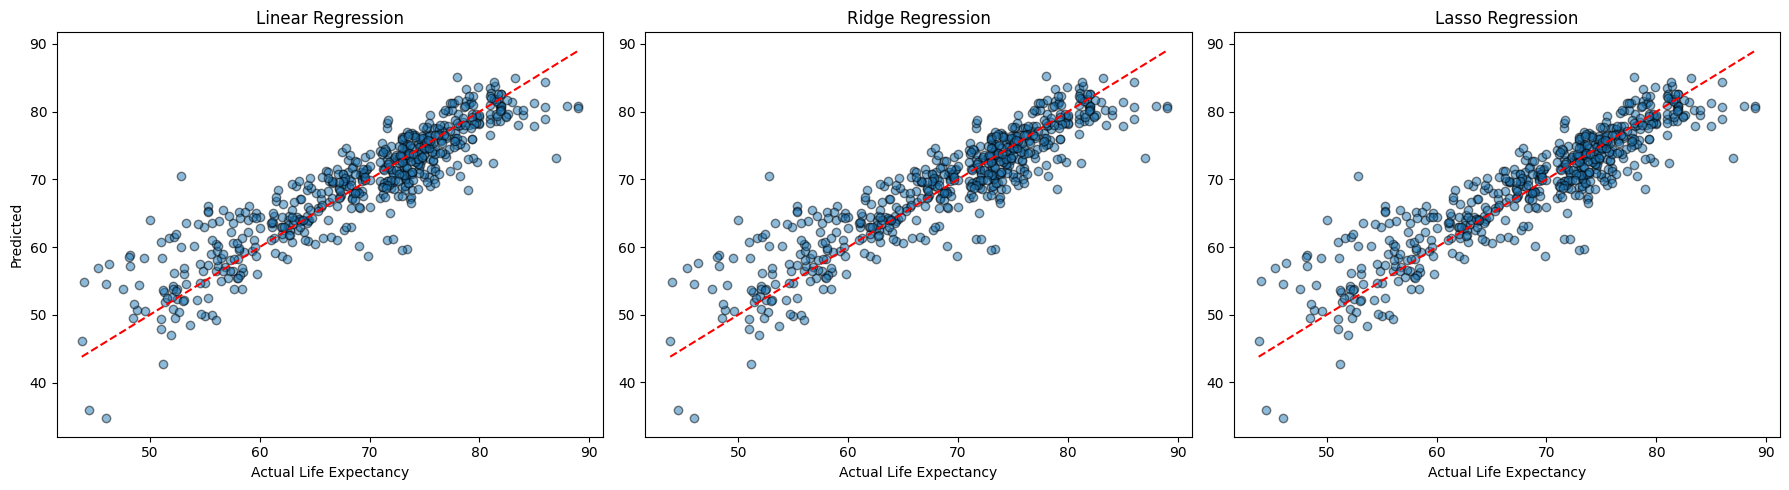

In [48]:
#3-3. Plot actual vs. predicted life expectancy scores for each model.

plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted')

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Ridge Regression')
plt.xlabel('Actual Life Expectancy')

# Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Lasso Regression')
plt.xlabel('Actual Life Expectancy')

plt.tight_layout()
plt.show()